## Testando com mais tempo e mais dados

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import extractor as ext

Em ordem a seguir temos um exemplo dos sensores

rest  
extension  
flexion  
ulnar_deviation  
radial_deviation  
grip  
finger_abduction  
finger_adduction  
supination  
pronation  

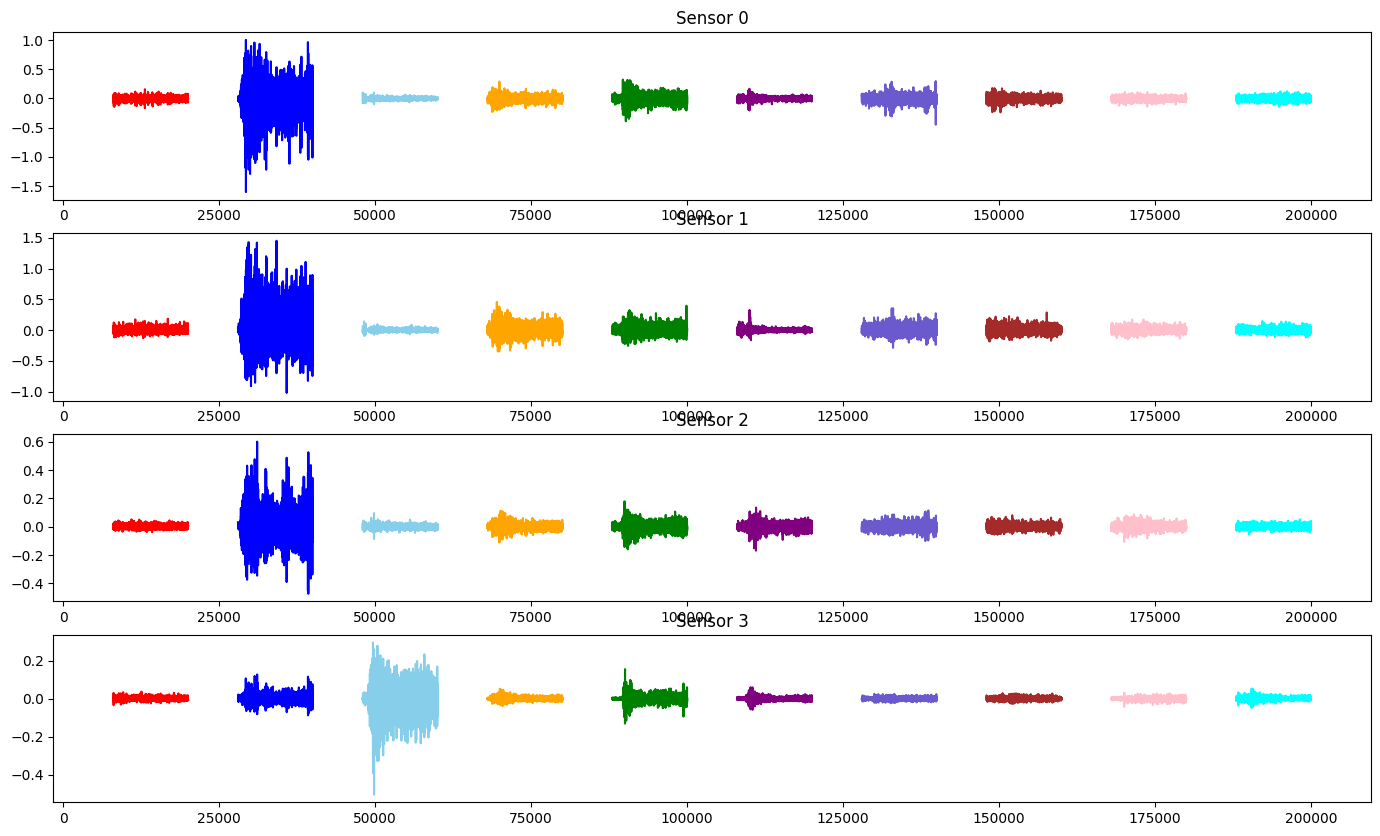

In [2]:
from IPython.display import Image
Image(filename="./sensores_movimetnos.png") 

In [3]:
base = pd.read_csv("./all_data_1sec.csv")
del base[base.columns[0]]
base.head()

,class,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
0,rest,0.027969,16.546442,593,0.829877,0.760960,0.020834,0.030327,20.467188,786,...,73,0.980622,0.878791,0.007530,0.006686,4.317294,31,0.739443,0.656068,0.004683
1,rest,0.314325,232.015644,1874,0.935619,0.873679,0.237730,0.290001,257.021178,1856,...,1613,1.008992,0.948542,0.071562,0.018218,11.062762,341,0.730146,0.491705,0.012646
2,rest,0.021656,13.160815,416,0.866464,0.759422,0.015649,0.021771,12.884492,403,...,219,1.006224,0.734301,0.009192,0.062570,35.654638,844,0.574473,0.184307,0.035975
3,rest,0.056408,35.352780,1188,0.891258,0.775229,0.041269,0.085088,84.416590,1631,...,541,0.974775,0.772864,0.016589,0.007947,5.389142,65,0.798949,0.581650,0.005505
4,rest,0.053758,28.227306,877,0.713120,0.601534,0.033820,0.044414,28.766126,970,...,269,0.763192,0.676346,0.013872,0.009064,4.063544,73,0.480649,0.392418,0.004072


In [4]:
def remove_outliers(ds, col):
    Q1 = ds[col].quantile(0.25)
    Q3 = ds[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return ds[(ds[col] >= lower_bound) & (ds[col] <= upper_bound)]

In [43]:
def get_score_and_accuracy(X, Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2)

    encoder = LabelEncoder()

    Y_train = encoder.fit_transform(Y_train)
    Y_test = encoder.transform(Y_test)

    model = KNeighborsClassifier()
    model.fit(X_train, Y_train)
    preds_valid = model.predict(X_test)

    dr = {} 
    dr['model'] = 'KNN'
    dr['MAE'] = mean_absolute_error(Y_test, preds_valid)
    dr['ACC'] = accuracy_score(Y_test, preds_valid)


    model = SVC()
    model.fit(X_train, Y_train)
    preds_valid = model.predict(X_test)

    dr_svm = {} 
    dr_svm['model'] = 'SVM'
    dr_svm['MAE'] = mean_absolute_error(Y_test, preds_valid)
    dr_svm['ACC'] = accuracy_score(Y_test, preds_valid)

    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)

    preds_valid = model.predict(X_test)

    dr_tree = {} 
    dr_tree['model'] = 'Tree Classifier'
    dr_tree['MAE'] = mean_absolute_error(Y_test, preds_valid)
    dr_tree['ACC'] = accuracy_score(Y_test, preds_valid)

    model = RandomForestClassifier()
    model.fit(X_train, Y_train)

    preds_valid = model.predict(X_test)

    dr_random = {} 
    dr_random['model'] = 'Random Forest'
    dr_random['MAE'] = mean_absolute_error(Y_test, preds_valid)
    dr_random['ACC'] = accuracy_score(Y_test, preds_valid)

    return pd.DataFrame([dr, dr_svm, dr_tree, dr_random])

In [6]:
# extension
# rest
# sensor_0

classes = ['extension', 'rest']

target_cols = 'class'
train_cols = ['SENSOR0_RMS']

rest_base = base.loc[base['class'] == 'rest']
extension_base = base.loc[base['class'] == 'extension']

rest_base = remove_outliers(rest_base, 'SENSOR0_RMS')
extension_base = remove_outliers(extension_base, 'SENSOR0_RMS')

cleased_base = pd.concat([rest_base, extension_base])

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.500000,0.500000
1,SVM,0.405405,0.594595
2,Tree Classifier,0.432432,0.567568


In [29]:
classes = ['extension', 'rest']

target_cols = 'class'
train_cols = ['SENSOR0_RMS', 'SENSOR1_RMS', 'SENSOR2_RMS', 'SENSOR3_RMS']

rest_base = base.loc[base['class'] == 'rest']
extension_base = base.loc[base['class'] == 'extension']

new_rest_bases = []
new_extension_bases = []
for i in train_cols:
    rest_removed = remove_outliers(rest_base, i)
    new_rest_bases.append(rest_removed)

    extension_removed = remove_outliers(extension_base, i)
    new_extension_bases.append(extension_removed)

cleased_base = pd.concat([*new_rest_bases, *new_extension_bases])

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.188153,0.811847
1,SVM,0.331010,0.668990
2,Tree Classifier,0.013937,0.986063


In [22]:
base['class'].unique()

array(['rest', 'extension', 'flexion', 'ulnar_deviation',
       'radial_deviation', 'grip', 'finger_abduction', 'finger_adduction',
       'supination', 'pronation'], dtype=object)

In [32]:
classes = ['extension', 'rest', 'flexion']

target_cols = 'class'
train_cols = ['SENSOR0_RMS', 'SENSOR1_RMS', 'SENSOR2_RMS', 'SENSOR3_RMS']

rest_base = base.loc[base['class'] == 'rest']
extension_base = base.loc[base['class'] == 'extension']
flexion_base = base.loc[base['class'] == 'flexion']

new_rest_bases = []
new_extension_bases = []
new_flexion_bases = []
for i in train_cols:
    rest_removed = remove_outliers(rest_base, i)
    new_rest_bases.append(rest_removed)

    extension_removed = remove_outliers(extension_base, i)
    new_extension_bases.append(extension_removed)

    flexion_removed = remove_outliers(flexion_base, i)
    new_flexion_bases.append(flexion_removed)



cleased_base = pd.concat([*new_rest_bases, *new_extension_bases, *new_flexion_bases])

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.428241,0.678241
1,SVM,0.787037,0.428241
2,Tree Classifier,0.037037,0.967593


In [38]:
classes = base['class'].unique()
# classes = ['extension', 'rest', 'flexion']


target_cols = 'class'
train_cols = ['SENSOR0_RMS', 'SENSOR1_RMS', 'SENSOR2_RMS', 'SENSOR3_RMS']


new_bases = []
for i in classes:
    curr_base = base.loc[base['class'] == i]
    for col in train_cols:
        no_out = remove_outliers(curr_base, col)
        new_bases.append(no_out)

cleased_base = pd.concat(new_bases)

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,1.833218,0.507236
1,SVM,2.696761,0.137147
2,Tree Classifier,0.092350,0.976568


In [39]:
classes = base['class'].unique()
# classes = ['extension', 'rest', 'flexion']


target_cols = 'class'
train_cols = ['SENSOR0_APPEN', 'SENSOR1_APPEN', 'SENSOR2_APPEN', 'SENSOR3_APPEN']


new_bases = []
for i in classes:
    curr_base = base.loc[base['class'] == i]
    for col in train_cols:
        no_out = remove_outliers(curr_base, col)
        new_bases.append(no_out)

cleased_base = pd.concat(new_bases)

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,1.555273,0.567980
1,SVM,3.138501,0.162643
2,Tree Classifier,0.028590,0.993011


In [40]:
classes = base['class'].unique()
# classes = ['extension', 'rest', 'flexion']


target_cols = 'class'
train_cols = ['SENSOR0_SAMPEN', 'SENSOR1_SAMPEN', 'SENSOR2_SAMPEN', 'SENSOR3_SAMPEN']


new_bases = []
for i in classes:
    curr_base = base.loc[base['class'] == i]
    for col in train_cols:
        no_out = remove_outliers(curr_base, col)
        new_bases.append(no_out)

cleased_base = pd.concat(new_bases)

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,1.452471,0.598226
1,SVM,3.202155,0.152725
2,Tree Classifier,0.000000,1.000000


In [41]:
classes = base['class'].unique()
# classes = ['extension', 'rest', 'flexion']


target_cols = 'class'
train_cols = ['SENSOR0_MAV', 'SENSOR1_MAV', 'SENSOR2_MAV', 'SENSOR3_MAV']


new_bases = []
for i in classes:
    curr_base = base.loc[base['class'] == i]
    for col in train_cols:
        no_out = remove_outliers(curr_base, col)
        new_bases.append(no_out)

cleased_base = pd.concat(new_bases)

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,1.695442,0.517956
1,SVM,2.994475,0.136740
2,Tree Classifier,0.078729,0.983425


In [46]:
classes = base['class'].unique()
# classes = ['extension', 'rest', 'flexion']


target_cols = 'class'
train_cols = ['SENSOR0_WAVELEN', 'SENSOR1_WAVELEN', 'SENSOR2_WAVELEN', 'SENSOR3_WAVELEN']


new_bases = []
for i in classes:
    curr_base = base.loc[base['class'] == i]
    for col in train_cols:
        no_out = remove_outliers(curr_base, col)
        new_bases.append(no_out)

cleased_base = pd.concat(new_bases)

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,1.757450,0.516979
1,SVM,3.106029,0.139986
2,Tree Classifier,0.100485,0.974359
3,Random Forest,0.097020,0.975052


In [7]:
sensor_0 = 'SENSOR0_APPEN'

train_cols = [sensor_0]
target_cols = 'class'

rest_base = base.loc[base['class'] == 'rest']
extension_base = base.loc[base['class'] == 'extension']

rest_base = remove_outliers(rest_base, sensor_0)
extension_base = remove_outliers(extension_base, sensor_0)

cleased_base = pd.concat([rest_base, extension_base])

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.5500,0.4500
1,SVM,0.4875,0.5125
2,Tree Classifier,0.5625,0.4375


In [8]:
sensor_0 = 'SENSOR0_SAMPEN'

train_cols = [sensor_0]
target_cols = 'class'

rest_base = base.loc[base['class'] == 'rest']
extension_base = base.loc[base['class'] == 'extension']

rest_base = remove_outliers(rest_base, sensor_0)
extension_base = remove_outliers(extension_base, sensor_0)

cleased_base = pd.concat([rest_base, extension_base])

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.544304,0.455696
1,SVM,0.468354,0.531646
2,Tree Classifier,0.518987,0.481013


In [9]:
sensor_0 = 'SENSOR0_MAV'

train_cols = [sensor_0]
target_cols = 'class'

rest_base = base.loc[base['class'] == 'rest']
extension_base = base.loc[base['class'] == 'extension']

rest_base = remove_outliers(rest_base, sensor_0)
extension_base = remove_outliers(extension_base, sensor_0)

cleased_base = pd.concat([rest_base, extension_base])

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.486486,0.513514
1,SVM,0.418919,0.581081
2,Tree Classifier,0.540541,0.459459


In [10]:
sensor_0 = 'SENSOR0_WAVELEN'

train_cols = [sensor_0]
target_cols = 'class'

rest_base = base.loc[base['class'] == 'rest']
extension_base = base.loc[base['class'] == 'extension']

rest_base = remove_outliers(rest_base, sensor_0)
extension_base = remove_outliers(extension_base, sensor_0)

cleased_base = pd.concat([rest_base, extension_base])

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.410959,0.589041
1,SVM,0.465753,0.534247
2,Tree Classifier,0.493151,0.506849


In [11]:
classes = ['extension', 'radial_deviation', 'flexion']
sensor_0 = 'SENSOR0_SAMPEN'

target_cols = 'class'
train_cols = [sensor_0]

rest_base = base.loc[base['class'] == 'rest']
extension_base = base.loc[base['class'] == 'extension']
flexion_base = base.loc[base['class'] == 'flexion']

rest_base = remove_outliers(rest_base, sensor_0)
extension_base = remove_outliers(extension_base, sensor_0)
flexion_base = remove_outliers(flexion_base, sensor_0)

cleased_base = pd.concat([extension_base, flexion_base])

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.4750,0.5250
1,SVM,0.4250,0.5750
2,Tree Classifier,0.5125,0.4875


In [12]:
classes = ['extension', 'radial_deviation', 'flexion', 'ulnar_deviation']
sensor_0 = 'SENSOR0_SAMPEN'

target_cols = 'class'
train_cols = [sensor_0]

rest_base = base.loc[base['class'] == 'rest']
extension_base = base.loc[base['class'] == 'extension']
flexion_base = base.loc[base['class'] == 'flexion']
ulnar_deviation_base = base.loc[base['class'] == 'ulnar_deviation']

rest_base = remove_outliers(rest_base, sensor_0)
extension_base = remove_outliers(extension_base, sensor_0)
flexion_base = remove_outliers(flexion_base, sensor_0)
ulnar_deviation_base = remove_outliers(ulnar_deviation_base, sensor_0)

cleased_base = pd.concat([extension_base, flexion_base])

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.4375,0.5625
1,SVM,0.4125,0.5875
2,Tree Classifier,0.4875,0.5125


In [13]:
classes = ['extension', 'radial_deviation', 'flexion', 'ulnar_deviation']
sensor_0 = 'SENSOR3_RMS'

target_cols = 'class'
train_cols = [sensor_0]

rest_base = base.loc[base['class'] == 'rest']
extension_base = base.loc[base['class'] == 'extension']
flexion_base = base.loc[base['class'] == 'flexion']
ulnar_deviation_base = base.loc[base['class'] == 'ulnar_deviation']

rest_base = remove_outliers(rest_base, sensor_0)
extension_base = remove_outliers(extension_base, sensor_0)
flexion_base = remove_outliers(flexion_base, sensor_0)
ulnar_deviation_base = remove_outliers(ulnar_deviation_base, sensor_0)

cleased_base = pd.concat([extension_base, flexion_base, ulnar_deviation_base, rest_base])

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,1.340426,0.255319
1,SVM,1.347518,0.312057
2,Tree Classifier,1.198582,0.304965


TODO: Test with different classes

Actually try to see the classes where we have an high acc and the low acc